In [4]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr, spearmanr, fisher_exact, mannwhitneyu, ttest_ind

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

from matplotlib.pyplot import rc_context
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.cm as cm

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
# from cnmf import cNMF, load_df_from_npz
import harmonypy
sys.path.append('../../../Code/')
# from utils import TCAT

from sklearn import metrics
from utils import read_dataset_log
import harmonypy as hm
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


In [5]:
from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap_density = plt.cm.hsv
cmaplist = [cmap_density(i) for i in range(cmap_density.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap_density = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap_density.N)

In [6]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# import pickle

In [7]:
from matplotlib import rcParams, font_manager

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
#rcParams['text.usetex'] = True

In [8]:
figdir = '../../../Figures/Components'

In [9]:
figdir

'../../../Figures/Components'

In [10]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data

In [11]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [12]:
lineage_geps = gep_info[gep_info['Class']=='Lineage']['Short_Name'].tolist()

In [13]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']

In [14]:
# Import the tab10 colormap
tab10_cmap = cm.get_cmap('tab10')


In [15]:
activation_threshold = 0.0625

# COMBAT

In [16]:
dataset = 'COMBAT'
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [17]:
count_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(count_fn)

Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixed20230831FiltForcNMF', '.h5ad'].


In [18]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [19]:
activation = pd.read_csv(params.loc[dataset, 'activation_score_fn'], index_col = 0, sep = '\t')
activation_score = activation['Activation_Score']
activation['Activation_Status'] = activation['Activation_Score'] > activation_threshold
activation = pd.merge(left=activation, right=adata.obs[['TCR_clone_ID', individual_col, sample_col, 'Source']], how='left', left_index=True, right_index=True)
activation['CellCycle_Usage'] = usage_norm.loc[activation.index, cc_geps].sum(axis=1)
activation['CellCycle_Bin'] = activation['CellCycle_Usage']>activation_threshold

In [20]:
activation['Source'].value_counts()

COVID_SEV         105905
Sepsis             66470
COVID_MILD         60544
COVID_HCW_MILD     51832
HV                 50641
COVID_CRIT         45802
COVID_LDN          10633
Flu                 7772
Name: Source, dtype: int64

In [21]:
activation_cov = activation.loc[activation['Source'].isin(['COVID_SEV', 'COVID_MILD', 'COVID_HCW_MILD', 'COVID_CRIT', 'COVID_LDN']), :]
vc = pd.DataFrame(activation_cov['TCR_clone_ID'].value_counts().drop('nan'))
vc.columns=['Clone_Size']

activation_cov = pd.merge(left=activation_cov, right=vc, left_on='TCR_clone_ID', right_index=True, how='left')
activation_cov['Is_NonUnique'] = activation_cov['Clone_Size']>1
activation_cov.loc[activation_cov['Clone_Size'].isnull(), 'Is_NonUnique'] = np.nan

allsampeclonecount = []
for (k,g) in activation_cov.groupby('COMBAT_ID'):
    sampclonecount = g['TCR_clone_ID'].astype(str).value_counts()
    if 'nan' in sampclonecount.index:
        sampclonecount = sampclonecount.drop('nan')
                                  
    sampclonecount = pd.DataFrame(sampclonecount)
    sampclonecount['COMBAT_ID'] = k
    allsampeclonecount.append(sampclonecount)
allsampeclonecount = pd.concat(allsampeclonecount, axis=0).reset_index()
allsampeclonecount.columns = ['TCR_clone_ID', 'PerSamp_Clone_Count', 'COMBAT_ID']

activation_cov = pd.merge(left=activation_cov, right=allsampeclonecount, left_on=['COMBAT_ID', 'TCR_clone_ID'],
                          right_on=['COMBAT_ID', 'TCR_clone_ID'], how='left')


activation_cov['Is_Clonal'] = activation_cov['PerSamp_Clone_Count']>1
activation_cov.loc[activation_cov['PerSamp_Clone_Count'].isnull(), 'Is_Clonal'] = np.nan

activation_cov.head(10)

,Activation_Score,Activation_Status,TCR_clone_ID,COMBAT_ID,COMBAT_participant_timepoint_ID,Source,CellCycle_Usage,CellCycle_Bin,Clone_Size,Is_NonUnique,PerSamp_Clone_Count,Is_Clonal
0,0.049099,False,TRA_CAVGDQTGANNLFF-TRB_CASSLRSGTSYF,S00112,S00112-Ja003,COVID_MILD,0.001055,False,51.0,True,51.0,True
1,0.023913,False,TRA_CADNFNKFYF-TRB_CASSESPGHSPLHF,S00005,S00005-Ja005,COVID_CRIT,0.003613,False,1.0,False,1.0,False
2,0.067063,True,TRA_CAMTPGGGADGLTF-TRB_CASGIGGLGNTEAFF,U00515,U00515-Ua005,COVID_LDN,0.001744,False,37.0,True,37.0,True
3,0.033488,False,TRA_CAVESGSGGGADGLTF-TRB_CASSQLAGSLGSTDTQYF,S00056,S00056-Ja003,COVID_SEV,0.003106,False,1.0,False,1.0,False
4,0.014324,False,TRA_CAMRGTQYGNKLVF-TRB_CASSYSGYGEQYF,S00005,S00005-Ja005,COVID_CRIT,0.003332,False,1.0,False,1.0,False
5,0.004986,False,TRB_CATSDLASGDTDTQYF,G05064,G05064-Ja005,COVID_HCW_MILD,0.000060,False,2.0,True,2.0,True
6,0.037948,False,TRA_CAASIRRTSYDKVIF-TRB_CASRRLAGVGGTGELFF,S00112,S00112-Ja003,COVID_MILD,0.002284,False,1.0,False,1.0,False
7,0.010405,False,TRA_CAELDSNYQLIW-TRB_CASSYSASQGGDEGYTF,U00515,U00515-Ua005,COVID_LDN,0.001281,False,1.0,False,1.0,False
8,0.010545,False,TRA_CAVTDGGATNKLIF-TRB_CAIKTSGLNTGELFF,S00005,S00005-Ja005,COVID_CRIT,0.001462,False,1.0,False,1.0,False
9,0.027839,False,TRA_CAVRDQDSNSGYALNF-TRB_CASSLVAGVNYGYTF,G05153,G05153-Ja005,COVID_HCW_MILD,0.001896,False,23.0,True,23.0,True


In [22]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_NonUnique'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.821944501638822 0.0


Is_NonUnique,False,True
Activation_Status,,
False,188639,40257
True,20048,7795


In [23]:
print(P)

0.0


In [24]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.8329814002066172 0.0


Is_Clonal,False,True
Activation_Status,,
False,189368,39528
True,20138,7705


In [25]:
ct = pd.crosstab(activation_cov['CellCycle_Bin'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

2.727384484351854 3.93e-321


Is_Clonal,False,True
CellCycle_Bin,,
False,204943,44529
True,4563,2704


In [26]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Score', 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               256739
Model:                          Logit   Df Residuals:                   256736
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.009576
Time:                        13:17:16   Log-Likelihood:            -1.2138e+05
converged:                       True   LL-Null:                   -1.2256e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6362      0.006   -266.137      0.000      -1.648      -1.624
Activation_Score     3.7224      0.103     35.970      0.000       3.520       3.925
CellCycle_Usage      2.6067      0.137     18.974      0.000       2.337       2.876
====================================================================================
"""

In [27]:
result.pvalues

const                0.000000e+00
Activation_Score    2.439001e-283
CellCycle_Usage      2.810159e-80
dtype: float64

In [28]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Status', 'CellCycle_Bin']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.473134
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               256739
Model:                          Logit   Df Residuals:                   256736
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.008863
Time:                        13:17:36   Log-Likelihood:            -1.2147e+05
converged:                       True   LL-Null:                   -1.2256e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5704      0.006   -283.767      0.000      -1.581      -1.560
Activation_Status     0.4460      0.016     27.313      0.000       0.414       0.478
CellCycle_Bin         0.6619      0.028     23.781      0.000       0.607       0.716
=====================================================================================
"""

In [29]:
result.pvalues

const                 0.000000e+00
Activation_Status    2.955178e-164
CellCycle_Bin        5.310424e-125
dtype: float64

In [30]:
x = activation_cov.loc[activation_cov['Activation_Status']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['Activation_Status']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=3487396681.0, pvalue=0.0)

In [31]:
x = activation_cov.loc[activation_cov['CellCycle_Bin']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['CellCycle_Bin']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=1072977962.0, pvalue=0.0)

In [32]:
activation_cov['Clone_Size_Bin'] = activation_cov['PerSamp_Clone_Count'].copy()
activation_cov.loc[activation_cov['Clone_Size_Bin']>5, 'Clone_Size_Bin'] = '6+'

In [33]:
activation_cov['Activation_Status_Label'] = activation_cov['Activation_Status'].replace({True:'Activated', False:'Not-activated'})
activation_cov['Proliferation_Status_Label'] = activation_cov['CellCycle_Bin'].replace({True:'Prolif.', False:'Not prolif.'})

In [34]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Activation_Status_Label,,,,,,
Activated,0.72327,0.071221,0.026542,0.017671,0.013935,0.147362
Not-activated,0.82731,0.035697,0.012080,0.006571,0.005710,0.112632


In [35]:
ct.sum(axis=1)

Activation_Status_Label
Activated         27843
Not-activated    228896
dtype: int64

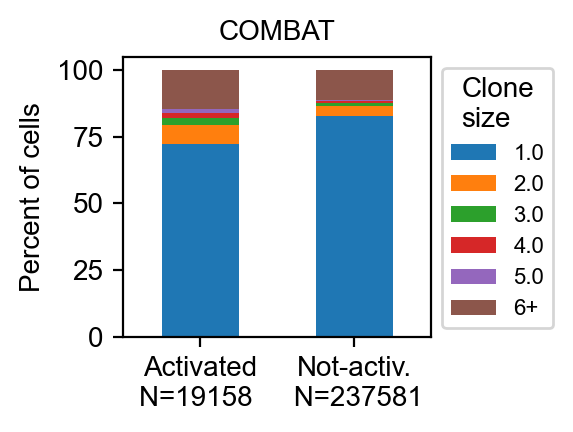

In [36]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2.8, 2), dpi=200, gridspec_kw={'left':.2, 'right':.75, 'bottom':.2, 'top':.9})
(ctfrac*100).plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent of cells', fontsize=10)
ax.set_xlabel('', fontsize=10)

ax.set_xticklabels(['Activated\nN=19158 ', 'Not-activ.\n N=237581'], fontsize=10, rotation=0)
ax.set_title('COMBAT', fontsize=10)

plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.png' % dataset))
plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.pdf' % dataset))

In [37]:
ct = pd.crosstab(activation_cov['Proliferation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Proliferation_Status_Label,,,,,,
Not prolif.,0.821507,0.038141,0.013019,0.007195,0.006309,0.113828
Prolif.,0.627907,0.087932,0.035228,0.027659,0.016651,0.204624


Text(0.5, 0, '')

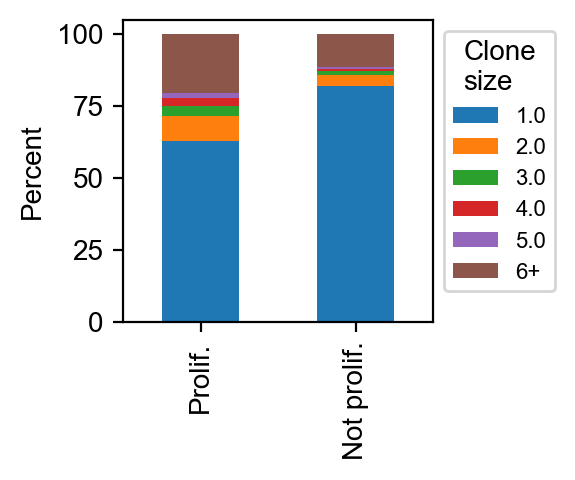

In [38]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
(ctfrac.loc[['Prolif.', 'Not prolif.'], :]*100).plot(kind='bar', stacked=True, ax=ax, )
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent', fontsize=10)
ax.set_xlabel('', fontsize=10)

In [39]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'], activation_cov['Proliferation_Status_Label'])
ct = ct.loc[['Not-activated', 'Activated'], :]
ct

Proliferation_Status_Label,Not prolif.,Prolif.
Activation_Status_Label,,
Not-activated,244804,1255
Activated,22225,6432


In [40]:
fisher_exact(ct)

(56.45196323367946, 0.0)

In [41]:
ct.loc['Activated', :]

Proliferation_Status_Label
Not prolif.    22225
Prolif.         6432
Name: Activated, dtype: int64

In [42]:
ct.loc['Activated', :].sum()

28657

In [43]:
ct.loc['Activated', :] / ct.loc['Activated', :].sum()

Proliferation_Status_Label
Not prolif.    0.775552
Prolif.        0.224448
Name: Activated, dtype: float64

# UK-COVID 

In [44]:
dataset = 'UK-Covid'
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [45]:
count_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(count_fn)

Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].
Only considering the two last: ['.ADTfixedADT_70FiltForcNMF', '.h5ad'].


In [46]:
usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
usage.columns = usage.columns.map(rename_map)
usage_norm = usage.div(usage.sum(axis=1), axis=0)

In [47]:
activation = pd.read_csv(params.loc[dataset, 'activation_score_fn'], index_col = 0, sep = '\t')
activation_score = activation['Activation_Score']
activation['Activation_Status'] = activation['Activation_Score'] > activation_threshold
activation = pd.merge(left=activation, right=adata.obs[[individual_col, sample_col,  'Status_on_day_collection_summary']], how='left', left_index=True, right_index=True)
activation['CellCycle_Usage'] = usage_norm.loc[activation.index, cc_geps].sum(axis=1)
activation['CellCycle_Bin'] = activation['CellCycle_Usage']>activation_threshold

In [48]:
tcrdata = pd.read_csv('../../../Data/PerDataset/UKCOVID/TCR_merged/TCR_merged-Updated.tsv', sep='\t')
tcrdata.head()

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CellID,Centre,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,...,Days_from_onset,time_after_LPS,Worst_Clinical_Status,Outcome,leiden,consensus,initial_clustering,study_id,AgeRange,Age
0,AAACCTGAGAAACCTA-MH9179824,Newcastle,AAACCTGAGAAACCTA-1,True,AAACCTGAGAAACCTA-1_contig_2,True,512,TRB,TRBV5-1,None,...,8,NaN,Moderate,Home,26,CD8,CD8,COVID-014,"(50, 59]",54
1,AAACCTGAGAAACCTA-MH9179824,Newcastle,AAACCTGAGAAACCTA-1,True,AAACCTGAGAAACCTA-1_contig_1,True,573,TRA,TRAV8-4,None,...,8,NaN,Moderate,Home,26,CD8,CD8,COVID-014,"(50, 59]",54
2,AAACCTGAGAACAATC-MH9143324,Newcastle,AAACCTGAGAACAATC-1,True,AAACCTGAGAACAATC-1_contig_1,True,635,TRB,TRBV19,None,...,16,NaN,Moderate,Home,25,gdT,gdT,COVID-029,"(20, 29]",26
3,AAACCTGAGAACTCGG-MH8919329,Newcastle,AAACCTGAGAACTCGG-1,True,AAACCTGAGAACTCGG-1_contig_1,True,499,TRA,TRAV34,None,...,5,NaN,Death,Death,23,Treg,Treg,COVID-045,"(70, 79]",77
4,AAACCTGAGAACTCGG-MH8919329,Newcastle,AAACCTGAGAACTCGG-1,True,AAACCTGAGAACTCGG-1_contig_2,True,496,TRB,TRBV5-1,None,...,5,NaN,Death,Death,23,Treg,Treg,COVID-045,"(70, 79]",77


In [49]:
activation = pd.merge(left=activation, right=tcrdata[['CellID', 'cdr3']], left_index=True, right_on='CellID', how='left')
activation.head()

,Activation_Score,Activation_Status,patient_id,sample_id,Status_on_day_collection_summary,CellCycle_Usage,CellCycle_Bin,CellID,cdr3
0.0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CASSARGASGERTDTQYF
1.0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CAVSVVRNNNARLMF
34.0,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CAFMKRTNNAGNMLTF
35.0,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CATSSNRYQPQHF
44.0,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CAVRDRAGGGNKLTF


In [50]:
activation['Status_on_day_collection_summary'].value_counts()

Moderate        120817
Mild            103064
Healthy          91885
Critical         50415
Severe           48853
Asymptomatic     31530
Non_covid        12555
LPS_90mins        2195
LPS_10hours       1949
Name: Status_on_day_collection_summary, dtype: int64

In [51]:
activation_cov = activation.loc[activation['Status_on_day_collection_summary'].isin(['Moderate', 'Mild', 'Critical', 'Severe']), :]
vc = pd.DataFrame(activation_cov['cdr3'].value_counts().dropna())
vc.columns=['Clone_Size']

activation_cov = pd.merge(left=activation_cov, right=vc, left_on='cdr3', right_index=True, how='left')
activation_cov['Is_NonUnique'] = activation_cov['Clone_Size']>1
activation_cov.loc[activation_cov['Clone_Size'].isnull(), 'Is_NonUnique'] = np.nan

allsampeclonecount = []
for (k,g) in activation_cov.groupby('patient_id'):
    sampclonecount = g['cdr3'].astype(str).value_counts()
    if 'nan' in sampclonecount.index:
        sampclonecount = sampclonecount.drop('nan')
                                  
    sampclonecount = pd.DataFrame(sampclonecount)
    sampclonecount['patient_id'] = k
    allsampeclonecount.append(sampclonecount)
allsampeclonecount = pd.concat(allsampeclonecount, axis=0).reset_index()
allsampeclonecount.columns = ['cdr3', 'PerSamp_Clone_Count', 'patient_id']

activation_cov = pd.merge(left=activation_cov, right=allsampeclonecount, left_on=['patient_id', 'cdr3'],
                          right_on=['patient_id', 'cdr3'], how='left')


activation_cov['Is_Clonal'] = activation_cov['PerSamp_Clone_Count']>1
activation_cov.loc[activation_cov['PerSamp_Clone_Count'].isnull(), 'Is_Clonal'] = np.nan

activation_cov.head(10)

,Activation_Score,Activation_Status,patient_id,sample_id,Status_on_day_collection_summary,CellCycle_Usage,CellCycle_Bin,CellID,cdr3,Clone_Size,Is_NonUnique,PerSamp_Clone_Count,Is_Clonal
0,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CASSARGASGERTDTQYF,60.0,True,60.0,True
1,0.068290,True,MH9179824,MH9179824,Moderate,0.008362,False,AAACCTGAGAAACCTA-MH9179824,CAVSVVRNNNARLMF,59.0,True,59.0,True
2,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CAFMKRTNNAGNMLTF,1.0,False,1.0,False
3,0.036078,False,MH9179824,MH9179824,Moderate,0.003925,False,AAACCTGAGAGTAATC-MH9179824,CATSSNRYQPQHF,1.0,False,1.0,False
4,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CAVRDRAGGGNKLTF,4.0,True,4.0,True
5,0.083498,True,MH9179824,MH9179824,Moderate,0.021557,False,AAACCTGAGAGTGAGA-MH9179824,CASSQTDSGNTIYF,6.0,True,6.0,True
6,0.042048,False,MH9179824,MH9179824,Moderate,0.010646,False,AAACCTGAGGAATCGC-MH9179824,CAATGSGGGADGLTF,2.0,True,2.0,True
7,0.042048,False,MH9179824,MH9179824,Moderate,0.010646,False,AAACCTGAGGAATCGC-MH9179824,CASRHGTGYEQYF,2.0,True,2.0,True
8,0.120738,True,MH9179824,MH9179824,Moderate,0.016728,False,AAACCTGAGTGTTGAA-MH9179824,CASSLYRGATSTDTQYF,2.0,True,2.0,True
9,0.120738,True,MH9179824,MH9179824,Moderate,0.016728,False,AAACCTGAGTGTTGAA-MH9179824,CATDEGASGTYKYIF,1.0,False,1.0,False


In [52]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_NonUnique'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.4886602117207144 0.0


Is_NonUnique,False,True
Activation_Status,,
False,129832,79683
True,34522,31541


In [53]:
ct = pd.crosstab(activation_cov['Activation_Status'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.6633495741991022 0.0


Is_Clonal,False,True
Activation_Status,,
False,152403,57112
True,40696,25367


In [54]:
ct = pd.crosstab(activation_cov['CellCycle_Bin'], activation_cov['Is_Clonal'])
OR, P = fisher_exact(ct)
print(OR, P)
ct

1.903877839037556 3.996446185103527e-34


Is_Clonal,False,True
CellCycle_Bin,,
False,192262,81801
True,837,678


In [55]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Score', 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.606090
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275575
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.006842
Time:                        13:18:20   Log-Likelihood:            -1.6703e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0746      0.007   -153.928      0.000      -1.088      -1.061
Activation_Score     4.7380      0.100     47.497      0.000       4.543       4.934
CellCycle_Usage     -1.3576      0.256     -5.303      0.000      -1.859      -0.856
====================================================================================
"""

In [56]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, [ 'CellCycle_Usage']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.610262
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275576
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:               5.286e-06
Time:                        13:18:21   Log-Likelihood:            -1.6817e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1824
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8471      0.005   -171.771      0.000      -0.857      -0.837
CellCycle_Usage    -0.3194      0.241     -1.324      0.186      -0.792       0.154
===================================================================================
"""

In [57]:
ind = ~activation_cov['Is_Clonal'].isnull()
X = sm.add_constant(activation_cov.loc[ind, ['Activation_Status', 'CellCycle_Bin']].astype(float))
y = activation_cov.loc[ind, 'Is_Clonal'].astype(float)
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604863
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Is_Clonal   No. Observations:               275578
Model:                          Logit   Df Residuals:                   275575
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.008853
Time:                        13:18:23   Log-Likelihood:            -1.6669e+05
converged:                       True   LL-Null:                   -1.6818e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9836      0.005   -200.241      0.000      -0.993      -0.974
Activation_Status     0.5048      0.009     53.721      0.000       0.486       0.523
CellCycle_Bin         0.5180      0.052      9.906      0.000       0.416       0.621
=====================================================================================
"""

In [58]:
result.pvalues

const                0.000000e+00
Activation_Status    0.000000e+00
CellCycle_Bin        3.922043e-23
dtype: float64

In [257]:
x = activation_cov.loc[activation_cov['Activation_Status']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['Activation_Status']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=4428119993.5, pvalue=0.0)

In [258]:
x = activation_cov.loc[activation_cov['CellCycle_Bin']==True, 'PerSamp_Clone_Count'].dropna()
y = activation_cov.loc[activation_cov['CellCycle_Bin']==False, 'PerSamp_Clone_Count'].dropna()
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=237682890.0, pvalue=2.5098108714312318e-33)

In [261]:
activation_cov['Activation_Status_Label'] = activation_cov['Activation_Status'].replace({True:'Activated', False:'Not-activated'})
activation_cov['Proliferation_Status_Label'] = activation_cov['CellCycle_Bin'].replace({True:'Prolif.', False:'Not prolif.'})

In [262]:
activation_cov['Clone_Size_Bin'] = activation_cov['PerSamp_Clone_Count'].copy()
activation_cov.loc[activation_cov['Clone_Size_Bin']>5, 'Clone_Size_Bin'] = '6+'

In [263]:
ct = pd.crosstab(activation_cov['Activation_Status_Label'],activation_cov['Clone_Size_Bin'])
ctfrac = ct.div(ct.sum(axis=1), axis=0)
ctfrac

Clone_Size_Bin,1.0,2.0,3.0,4.0,5.0,6+
Activation_Status_Label,,,,,,
Activated,0.531310,0.052384,0.021941,0.018439,0.012071,0.363855
Not-activated,0.721391,0.049314,0.016206,0.009557,0.006283,0.197249


In [264]:
ct.sum(axis=1)

Activation_Status_Label
Activated         29990
Not-activated    245588
dtype: int64

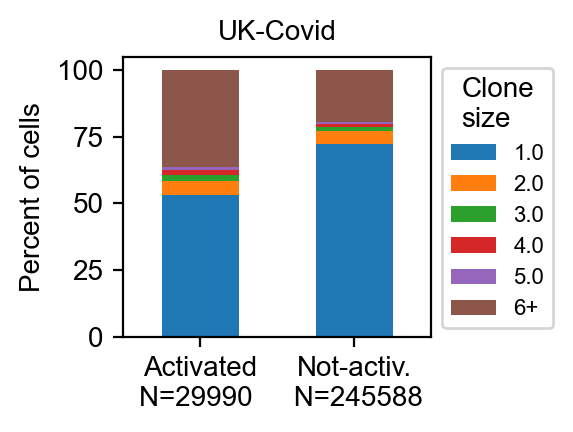

In [265]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors for 1, 2, 3, 4, '5+'

# Plotting with specified colors
fig, ax = plt.subplots(figsize=(2.8, 2), dpi=200, gridspec_kw={'left':.2, 'right':.75, 'bottom':.2, 'top':.9})
(ctfrac*100).plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1), fontsize=8, title='Clone\nsize')
ax.set_ylabel('Percent of cells', fontsize=10)
ax.set_xlabel('', fontsize=10)

ax.set_xticklabels(['Activated\nN=29990 ', 'Not-activ.\n N=245588'], fontsize=10, rotation=0)
ax.set_title('UK-Covid', fontsize=10)

plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.png' % dataset))
plt.savefig(os.path.join(figdir, 'ClonalityVsActivation.%s.pdf' % dataset))